DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

IMPORTING AND PREPROCESSING

In [ ]:
gold_dataset = pd.read_csv("data.csv")
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
gold_dataset.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

<Axes: >

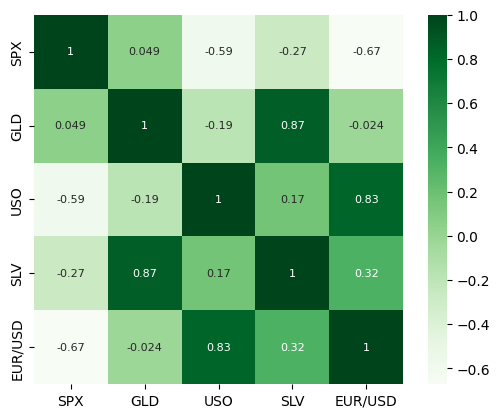

In [15]:
gold_dataset.head()
corr_matrics = gold_dataset.corr()
sns.heatmap(corr_matrics , cbar= True , square= True , annot=True , annot_kws= {"size" : 8} , cmap="Greens")

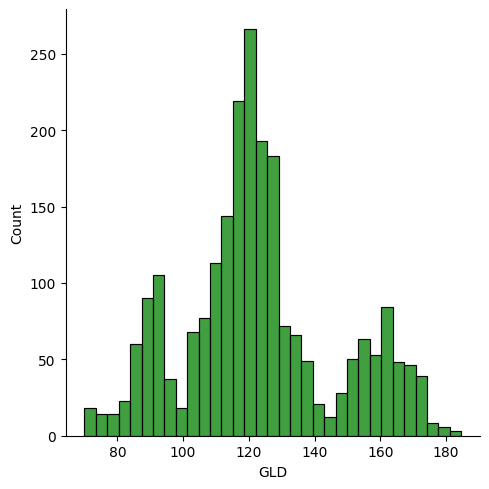

In [16]:
#Checking the distribution of GOLD
sns.displot(gold_dataset['GLD'] , color= "green")

In [17]:
gold_dataset.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

SPLITTING THE FEATURES AND TARGET

In [20]:
x = gold_dataset.drop(columns=["GLD"])
y = gold_dataset["GLD"]

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2 , random_state=2)

TRAIN PREDICT AND EVALUATION

In [23]:
regression = RandomForestRegressor(n_estimators=100)
regression.fit(train_x , train_y)

#r squre error on Train data
train_predict = regression.predict(train_x)
error_score = metrics.r2_score(train_y , train_predict)
print("r Square error is " , error_score)

#r squre error on Test data
test_predict = regression.predict(test_x)
error_score = metrics.r2_score(test_y , test_predict)
print("r Square error is " , error_score)

r Square error is  0.998284660498064
r Square error is  0.9892453659380076


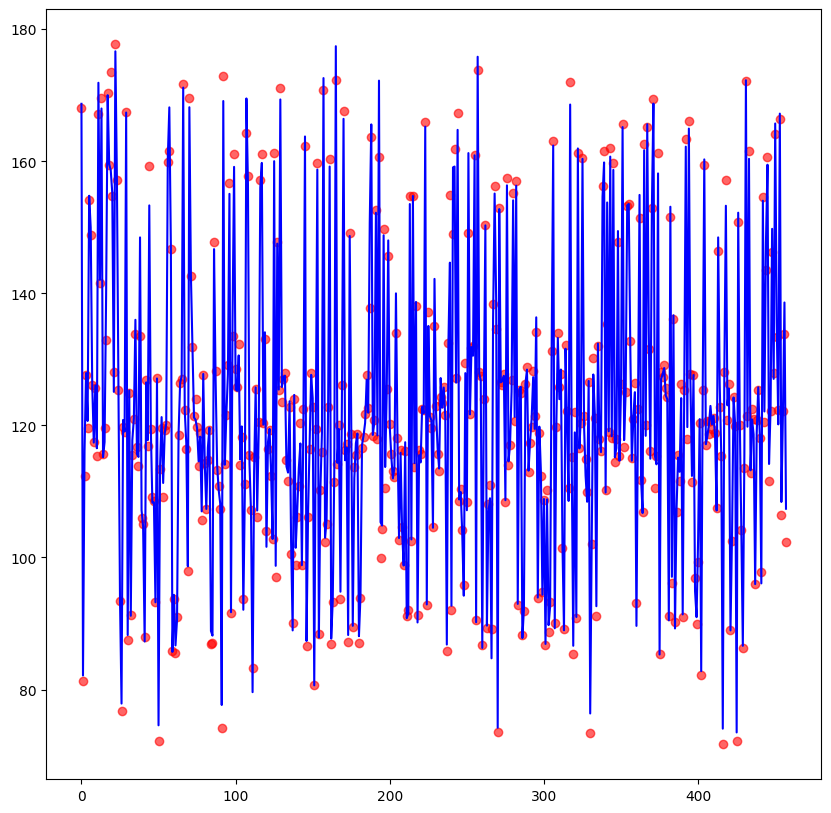

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(test_y)) , test_y , color="red" , alpha = 0.6)
#plt.scatter(range(len(test_predict)) , test_predict , color = "blue" )
plt.plot(range(len(test_predict)) , test_predict , color = "blue" )